In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

mpg.csv dosyasını okuyun ve df değişkenine atayın.
1) df'in içindeki sütunların birbirleriyle olan korelasyonlarına(ilişkilerine) bakın.

In [2]:
df = pd.read_csv("mpg.csv")
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   name          398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [4]:
df['horsepower'] = pd.to_numeric(df['horsepower'], errors='coerce')


errors='coerce' parametresi, dönüştürülemeyen değerleri NaN olarak işaretler. Bu yüzden, dönüştürme işleminden sonra eksik verileri kontrol etmek gereklidir. bu örnekte horsepower bazı değerleri "?" olduğu için sayısal formata dönüştürülemiyordu, o değerler NaN olacak. Haliyle ileride üzerinde işlem yaparken dikkat etmen gereken bir sütun.


In [5]:
df.info() # NaN değerler float olarak kabul edilir

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   name          398 non-null    object 
dtypes: float64(4), int64(4), object(1)
memory usage: 28.1+ KB


<Axes: >

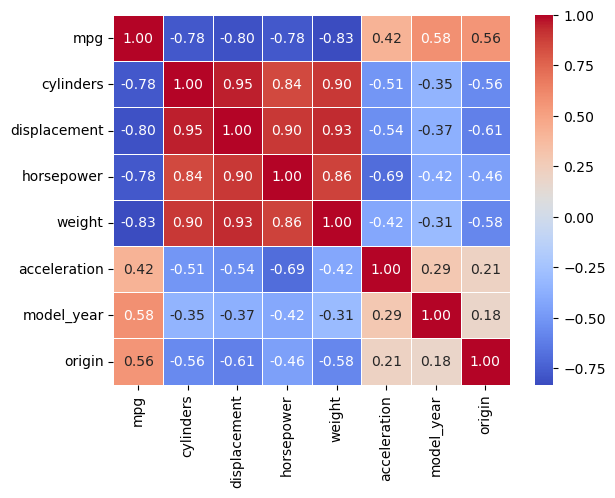

In [6]:
sns.heatmap(df.corr(numeric_only=True) , annot = True , cmap='coolwarm', fmt='.2f', linewidths=0.5)

df ile ilgili bazı ön bilgiler.
mpg: Mil başına galon (yakıt verimliliği)

cylinders: Silindir sayısı

displacement: Motorun hacmi

horsepower: Beygir gücü

weight: Araç ağırlığı

acceleration: Hızlanma

model_year: Model yılı

origin: Köken

name: Araç ismi

2) mpg sütunu ile diğer sütunların arasındaki korelasyonları özel olarak inceleyin.(Bunu göstermedik ama df.corr() çağırdıktan sonra aynı normal df'lerde olduğu gibi istediğiniz sütunu çağırabiliyorsunuz.)

In [7]:
df.corr(numeric_only=True)["mpg"]

mpg             1.000000
cylinders      -0.775396
displacement   -0.804203
horsepower     -0.778427
weight         -0.831741
acceleration    0.420289
model_year      0.579267
origin          0.563450
Name: mpg, dtype: float64

3) cylinders sütununda hangi unique değerler olduğuna liste halinde bakın.

In [8]:
df.cylinders.unique()

array([8, 4, 6, 3, 5], dtype=int64)

4) cylinders sütunundaki unique değerlerin her birinden kaçar adet olduğuna bakın.

In [9]:
df['cylinders'].value_counts()

cylinders
4    204
8    103
6     84
3      4
5      3
Name: count, dtype: int64

5) Arabanın modeli 75-80 yılları arasındaki arabaların hepsini getirin.(75 ve 80 dahil)

In [10]:
df[df["model_year"].between(75,80)] # query ile de yapılabilir.

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
152,19.0,6,225.0,95.0,3264,16.0,75,1,plymouth valiant custom
153,18.0,6,250.0,105.0,3459,16.0,75,1,chevrolet nova
154,15.0,6,250.0,72.0,3432,21.0,75,1,mercury monarch
155,15.0,6,250.0,72.0,3158,19.5,75,1,ford maverick
156,16.0,8,400.0,170.0,4668,11.5,75,1,pontiac catalina
...,...,...,...,...,...,...,...,...,...
333,32.7,6,168.0,132.0,2910,11.4,80,3,datsun 280-zx
334,23.7,3,70.0,100.0,2420,12.5,80,3,mazda rx-7 gs
335,35.0,4,122.0,88.0,2500,15.1,80,2,triumph tr7 coupe
336,23.6,4,140.0,NaN,2905,14.3,80,1,ford mustang cobra


6) horsepower'ı 155-180 arasındaki arabaların hepsini getirin.(155 dahil, 180 dahil değil)(Bu sorguyu yapabilmeniz için horsepower sütununu object durumdan float duruma getirmeniz gerekiyor.)

In [11]:
df[df["horsepower"].between(155,180,inclusive = "right")]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
10,15.0,8,383.0,170.0,3563,10.0,70,1,dodge challenger se
11,14.0,8,340.0,160.0,3609,8.0,70,1,plymouth 'cuda 340
38,14.0,8,350.0,165.0,4209,12.0,71,1,chevrolet impala
39,14.0,8,400.0,175.0,4464,11.5,71,1,pontiac catalina brougham
42,12.0,8,383.0,180.0,4955,11.5,71,1,dodge monaco (sw)
43,13.0,8,400.0,170.0,4746,12.0,71,1,ford country squire (sw)
44,13.0,8,400.0,175.0,5140,12.0,71,1,pontiac safari (sw)
62,13.0,8,350.0,165.0,4274,12.0,72,1,chevrolet impala
63,14.0,8,400.0,175.0,4385,12.0,72,1,pontiac catalina


7) Elinizdeki df'i horsepower'a göre büyükten küçüğe sıralayın ardından df'in indexlerini sıfırlayın.

In [12]:
df.sort_values(by =["horsepower"] , ascending=False , inplace=True)
df.reset_index(drop=True, inplace=True)

8) Elinizdeki df'den en küçük 5 acceralation'a sahip olan arabaları getirin.

In [13]:
df.nsmallest(5, 'acceleration')

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
37,14.0,8,340.0,160.0,3609,8.0,70,1,plymouth 'cuda 340
6,14.0,8,440.0,215.0,4312,8.5,70,1,plymouth fury iii
14,15.0,8,390.0,190.0,3850,8.5,70,1,amc ambassador dpl
4,14.0,8,454.0,220.0,4354,9.0,70,1,chevrolet impala
0,16.0,8,400.0,230.0,4278,9.5,73,1,pontiac grand prix



--- CIA_Country_Facts.csv dosyasını okuyun ve yeniden df değişkenine atayın.(Artık eski df ile işimiz kalmadığı için aynı ismi verebiliriz.)
9) Elimizdeki CIA'in ülkeler hakkında topladığı basit açık kaynak verileri df'inde kaç ülkenin verisi olduğunu bulun.

In [14]:
df = pd.read_csv("CIA_Country_Facts.csv")
df.head()

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,3.2,12.13,0.22,87.65,1.0,46.60,20.34,0.380,0.240,0.380
1,Albania,EASTERN EUROPE,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,71.2,21.09,4.42,74.49,3.0,15.11,5.22,0.232,0.188,0.579
2,Algeria,NORTHERN AFRICA,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,70.0,78.1,3.22,0.25,96.53,1.0,17.14,4.61,0.101,0.600,0.298
3,American Samoa,OCEANIA,57794,199,290.4,58.29,-20.71,9.27,8000.0,97.0,259.5,10.00,15.00,75.00,2.0,22.46,3.27,NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,152.1,0.00,6.60,4.05,19000.0,100.0,497.2,2.22,0.00,97.78,3.0,8.71,6.25,NaN,NaN,NaN


In [15]:
df["Country"].nunique() # kaç farklı değer olduğu döner

227

chatgpt elimdeki veri seti hakkında şöyle bir bilgilendirme yapabiliyor :

Country: Ülkenin adı.

Region: Ülkenin bulunduğu bölge. Örneğin, "ASIA (EX. NEAR EAST)" gibi.

Population: Ülkenin toplam nüfusu.

Area (sq. mi.): Ülkenin yüzölçümü (mil kare cinsinden).

Pop. Density (per sq. mi.): Nüfus yoğunluğu (mil kare başına kişi sayısı).

Coastline (coast/area ratio): Kıyı uzunluğu (kıyı uzunluğu / yüzölçümü oranı).

Net migration: Net göç (göç eden ve göç eden kişilerin farkı).

Infant mortality (per 1000 births): 1000 doğum başına bebek ölümleri.

GDP ($ per capita): Kişi başına düşen Gayri Safi Yurtiçi Hasıla (GSYİH) (dolar cinsinden).

Literacy (%): Okuryazarlık oranı (%).

Phones (per 1000): 1000 kişiye düşen telefon sayısı.

Arable (%): Tarıma elverişli arazi oranı (%).

Crops (%): Tarım ürünlerinin arazi kullanımındaki oranı (%).

Other (%): Diğer kullanım oranı (%).

Climate: İklim türü. Örneğin, "Tropical" veya "Temperate".

Birthrate: Doğum oranı (1000 kişi başına doğum sayısı).

Deathrate: Ölüm oranı (1000 kişi başına ölüm sayısı).

Agriculture: Tarım sektörünün GSYİH içindeki payı.

Industry: Sanayi sektörünün GSYİH içindeki payı.

Service: Hizmet sektörünün GSYİH içindeki payı.

10) Elimizdeki sütunlardan hangilerinde kaçar tane nan veri olduğunu bulun.

In [16]:
df.isnull().sum()

Country                                0
Region                                 0
Population                             0
Area (sq. mi.)                         0
Pop. Density (per sq. mi.)             0
Coastline (coast/area ratio)           0
Net migration                          3
Infant mortality (per 1000 births)     3
GDP ($ per capita)                     1
Literacy (%)                          18
Phones (per 1000)                      4
Arable (%)                             2
Crops (%)                              2
Other (%)                              2
Climate                               22
Birthrate                              3
Deathrate                              4
Agriculture                           15
Industry                              16
Service                               15
dtype: int64

11) Elimizde tamamen nan değerlerden oluşan bir satır varsa o satırı düşürün.(Tamamen nan değerlerden oluşan bir satır olup olmadığını, herhangi bir satırın düşüp düşmediğini kontrol edin)

In [17]:
df.dropna(how = "all" , inplace=True)

12) Her Bölgedeki(Region) toplam kişi sayısına bakın.

In [18]:
df.groupby("Region")["Population"].sum()

Region
ASIA (EX. NEAR EAST)                   3687982236
BALTICS                                   7184974
C.W. OF IND. STATES                     280081548
EASTERN EUROPE                          119914717
LATIN AMER. & CARIB                     561824599
NEAR EAST                               195068377
NORTHERN AFRICA                         161407133
NORTHERN AMERICA                        331672307
OCEANIA                                  33131662
SUB-SAHARAN AFRICA                      749437000
WESTERN EUROPE                          396339998
Name: Population, dtype: int64

13) Climate değerleri nan olanlar, tüm df'in ortalama climate değeriyle doldurun.(Gerçek bir analiz yapıyor olsaydık bu çok mantıklı bir hareket olmazdı, belki her bulunduğu bölgenin ortalama climate değeriyle doldurmak daha mantıklı bir hareket olurdu. Fakat şimdilik bu kadar kasmaya gerek yok. nan değerleri tüm climate ortalamalarıyla doldursanız yeterli.)

In [19]:
df[df["Climate"].isna()]

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
5,Angola,SUB-SAHARAN AFRICA,12127071,1246700,9.7,0.13,0.00,191.19,1900.0,42.0,7.8,2.41,0.24,97.35,NaN,45.11,24.20,0.096,0.658,0.246
36,Canada,NORTHERN AMERICA,33098932,9984670,3.3,2.02,5.96,4.75,29800.0,97.0,552.2,4.96,0.02,95.02,NaN,10.78,7.80,0.022,0.294,0.684
50,Croatia,EASTERN EUROPE,4494749,56542,79.5,10.32,1.58,6.84,10600.0,98.5,420.4,26.09,2.27,71.65,NaN,9.61,11.48,0.070,0.308,0.622
66,Faroe Islands,WESTERN EUROPE,47246,1399,33.8,79.84,1.41,6.24,22000.0,NaN,503.8,2.14,0.00,97.86,NaN,14.05,8.70,0.270,0.110,0.620
78,Gibraltar,WESTERN EUROPE,27928,7,3989.7,171.43,0.00,5.13,17500.0,NaN,877.7,0.00,0.00,100.00,NaN,10.74,9.31,NaN,NaN,NaN
101,Italy,WESTERN EUROPE,58133509,301230,193.0,2.52,2.07,5.94,26700.0,98.6,430.9,27.79,9.53,62.68,NaN,8.72,10.40,0.021,0.291,0.688
115,Lebanon,NEAR EAST,3874050,10400,372.5,2.16,0.00,24.52,4800.0,87.4,255.6,16.62,13.98,69.40,NaN,18.52,6.21,0.120,0.210,0.670
118,Libya,NORTHERN AFRICA,5900754,1759540,3.4,0.10,0.00,24.60,6400.0,82.6,127.1,1.03,0.19,98.78,NaN,26.49,3.48,0.076,0.499,0.425
120,Lithuania,BALTICS,3585906,65200,55.0,0.14,-0.71,6.89,11400.0,99.6,223.4,45.22,0.91,53.87,NaN,8.75,10.98,0.055,0.325,0.620
121,Luxembourg,WESTERN EUROPE,474413,2586,183.5,0.00,8.97,4.81,55100.0,100.0,515.4,23.28,0.40,76.32,NaN,11.94,8.41,0.010,0.130,0.860


In [20]:
df['Climate'] = df.groupby("Region")["Climate"].transform(lambda x : x.fillna(x.mean()))

14) Bölgeler ve Ülkelere göre gruplama yapın ardından Doğum miktarlarına bakın.

In [21]:
df.groupby(["Region","Country"])["Birthrate"].agg(['mean', 'min', 'max']) # 1 tane değer olduğundan tüm agg ler için aynı sonuç.

mean    min    max
Region                              Country                            
ASIA (EX. NEAR EAST)                Afghanistan     46.60  46.60  46.60
                                    Bangladesh      29.80  29.80  29.80
                                    Bhutan          33.65  33.65  33.65
                                    Brunei          18.79  18.79  18.79
                                    Burma           17.91  17.91  17.91
...                                                   ...    ...    ...
WESTERN EUROPE                      San Marino      10.02  10.02  10.02
                                    Spain           10.06  10.06  10.06
                                    Sweden          10.27  10.27  10.27
                                    Switzerland      9.71   9.71   9.71
                                    United Kingdom  10.71  10.71  10.71

[227 rows x 3 columns]

15) Veriyi istediğiniz şekilde inceleyerek bu zamana kadar öğrendiğiniz bilgilerle anlamlı 5 adet yargı cümlesi çıkartın. ( En çok insan Asya kıtasında yaşıyor, En çok insan Afrinın sahralarında ölüyor, Ortalama en yüksek telefon sahibi Kuzey Amerikada, En çok okuma yazma oranına sahip ülkeler Baltık ülkeleri vb.)